In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import numpy as np

train = pd.read_csv('E:/personal_projects/competitive-data-science-predict-future-sales/sales_train.csv')

test = pd.read_csv('E:/personal_projects/competitive-data-science-predict-future-sales/test.csv')
items = pd.read_csv('E:/personal_projects/competitive-data-science-predict-future-sales/items.csv')
categories = pd.read_csv('E:/personal_projects/competitive-data-science-predict-future-sales/item_categories.csv')
shops = pd.read_csv('E:/personal_projects/competitive-data-science-predict-future-sales/shops.csv')

In [2]:
test.shape

(214200, 3)

In [3]:
import datetime , nltk

In [4]:
train['date'] = pd.to_datetime(train['date'], format = "%d.%m.%Y")

In [5]:
train['year'] = train['date'].dt.year

In [6]:
train['month'] = train['date'].dt.month

In [7]:
train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,year,month
0,2013-01-02,0,59,22154,999.00,1.0,2013,1
1,2013-01-03,0,25,2552,899.00,1.0,2013,1
2,2013-01-05,0,25,2552,899.00,-1.0,2013,1
3,2013-01-06,0,25,2554,1709.05,1.0,2013,1
4,2013-01-15,0,25,2555,1099.00,1.0,2013,1
...,...,...,...,...,...,...,...,...
2935844,2015-10-10,33,25,7409,299.00,1.0,2015,10
2935845,2015-10-09,33,25,7460,299.00,1.0,2015,10
2935846,2015-10-14,33,25,7459,349.00,1.0,2015,10
2935847,2015-10-22,33,25,7440,299.00,1.0,2015,10


In [8]:
shops

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4
5,"Вологда ТРЦ ""Мармелад""",5
6,"Воронеж (Плехановская, 13)",6
7,"Воронеж ТРЦ ""Максимир""",7
8,"Воронеж ТРЦ Сити-Парк ""Град""",8
9,Выездная Торговля,9


In [9]:
train.drop(['date'], inplace = True , axis = 1)

In [10]:
train = train.groupby([c for c in train.columns if c not in ['item_cnt_day'] ], as_index = False)['item_cnt_day'].sum()
train

,date_block_num,shop_id,item_id,item_price,year,month,item_cnt_day
0,0,0,32,221.0,2013,1,6.0
1,0,0,33,347.0,2013,1,3.0
2,0,0,35,247.0,2013,1,1.0
3,0,0,43,221.0,2013,1,1.0
4,0,0,51,127.0,2013,1,1.0
...,...,...,...,...,...,...,...
1739017,33,59,22087,119.0,2015,10,6.0
1739018,33,59,22088,119.0,2015,10,2.0
1739019,33,59,22091,179.0,2015,10,1.0
1739020,33,59,22100,629.0,2015,10,1.0


In [11]:
train = train.rename(columns = {'item_cnt_day' : 'item_cnt_month'})

In [12]:
train

,date_block_num,shop_id,item_id,item_price,year,month,item_cnt_month
0,0,0,32,221.0,2013,1,6.0
1,0,0,33,347.0,2013,1,3.0
2,0,0,35,247.0,2013,1,1.0
3,0,0,43,221.0,2013,1,1.0
4,0,0,51,127.0,2013,1,1.0
...,...,...,...,...,...,...,...
1739017,33,59,22087,119.0,2015,10,6.0
1739018,33,59,22088,119.0,2015,10,2.0
1739019,33,59,22091,179.0,2015,10,1.0
1739020,33,59,22100,629.0,2015,10,1.0


items

In [13]:
categories

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4
...,...,...
79,Служебные,79
80,Служебные - Билеты,80
81,Чистые носители (шпиль),81
82,Чистые носители (штучные),82


In [14]:
## mean of sales per product per shop
train_mean_month = train [['shop_id','item_id','item_cnt_month']].groupby(['shop_id','item_id'], as_index=False)[['item_cnt_month']].mean()


In [15]:
train_mean_month= train_mean_month.rename(columns = {'item_cnt_month' : 'item_mean_month'})
train

,date_block_num,shop_id,item_id,item_price,year,month,item_cnt_month
0,0,0,32,221.0,2013,1,6.0
1,0,0,33,347.0,2013,1,3.0
2,0,0,35,247.0,2013,1,1.0
3,0,0,43,221.0,2013,1,1.0
4,0,0,51,127.0,2013,1,1.0
...,...,...,...,...,...,...,...
1739017,33,59,22087,119.0,2015,10,6.0
1739018,33,59,22088,119.0,2015,10,2.0
1739019,33,59,22091,179.0,2015,10,1.0
1739020,33,59,22100,629.0,2015,10,1.0


In [16]:
train= pd.merge(train , train_mean_month , how = 'left' ,on = ['shop_id' ,'item_id'] )

In [17]:
train 

,date_block_num,shop_id,item_id,item_price,year,month,item_cnt_month,item_mean_month
0,0,0,32,221.0,2013,1,6.0,8.000000
1,0,0,33,347.0,2013,1,3.0,3.000000
2,0,0,35,247.0,2013,1,1.0,7.500000
3,0,0,43,221.0,2013,1,1.0,1.000000
4,0,0,51,127.0,2013,1,1.0,1.666667
...,...,...,...,...,...,...,...,...
1739017,33,59,22087,119.0,2015,10,6.0,6.235294
1739018,33,59,22088,119.0,2015,10,2.0,6.000000
1739019,33,59,22091,179.0,2015,10,1.0,2.294118
1739020,33,59,22100,629.0,2015,10,1.0,1.000000


In [18]:
shop_prev_month = train [train['date_block_num'] == 33 ]  [['shop_id' ,'item_id' ,'item_cnt_month'] ]
shop_prev_month = shop_prev_month.groupby(['item_id' , 'shop_id'] , as_index= False)['item_cnt_month'].sum()

shop_prev_month = shop_prev_month.rename(columns = {'item_cnt_month' : 'item_cnt_prev_month'})

In [19]:
train

,date_block_num,shop_id,item_id,item_price,year,month,item_cnt_month,item_mean_month
0,0,0,32,221.0,2013,1,6.0,8.000000
1,0,0,33,347.0,2013,1,3.0,3.000000
2,0,0,35,247.0,2013,1,1.0,7.500000
3,0,0,43,221.0,2013,1,1.0,1.000000
4,0,0,51,127.0,2013,1,1.0,1.666667
...,...,...,...,...,...,...,...,...
1739017,33,59,22087,119.0,2015,10,6.0,6.235294
1739018,33,59,22088,119.0,2015,10,2.0,6.000000
1739019,33,59,22091,179.0,2015,10,1.0,2.294118
1739020,33,59,22100,629.0,2015,10,1.0,1.000000


In [20]:
shop_prev_month

,item_id,shop_id,item_cnt_prev_month
0,30,31,1.0
1,31,2,1.0
2,31,6,2.0
3,31,18,1.0
4,31,21,1.0
...,...,...,...
31526,22167,28,1.0
31527,22167,37,1.0
31528,22167,42,4.0
31529,22167,47,1.0


In [21]:
train= pd.merge(train , shop_prev_month , how = 'left' ,on = ['shop_id' ,'item_id'] )

In [22]:
train = train.fillna(0.)

In [23]:
train

,date_block_num,shop_id,item_id,item_price,year,month,item_cnt_month,item_mean_month,item_cnt_prev_month
0,0,0,32,221.0,2013,1,6.0,8.000000,0.0
1,0,0,33,347.0,2013,1,3.0,3.000000,0.0
2,0,0,35,247.0,2013,1,1.0,7.500000,0.0
3,0,0,43,221.0,2013,1,1.0,1.000000,0.0
4,0,0,51,127.0,2013,1,1.0,1.666667,0.0
...,...,...,...,...,...,...,...,...,...
1739017,33,59,22087,119.0,2015,10,6.0,6.235294,6.0
1739018,33,59,22088,119.0,2015,10,2.0,6.000000,2.0
1739019,33,59,22091,179.0,2015,10,1.0,2.294118,1.0
1739020,33,59,22100,629.0,2015,10,1.0,1.000000,1.0


In [24]:
## Adding now all the features : 
train =  pd.merge (train ,  items , how  = 'left',on = ['item_id'])

In [25]:
train =  pd.merge (train ,  categories , how  = 'left',on = ['item_category_id'])

In [26]:
train =  pd.merge (train ,  shops , how  = 'left',on = ['shop_id'])

In [27]:
train 

,date_block_num,shop_id,item_id,item_price,year,month,item_cnt_month,item_mean_month,item_cnt_prev_month,item_name,item_category_id,item_category_name,shop_name
0,0,0,32,221.0,2013,1,6.0,8.000000,0.0,1+1,40,Кино - DVD,"!Якутск Орджоникидзе, 56 фран"
1,0,0,33,347.0,2013,1,3.0,3.000000,0.0,1+1 (BD),37,Кино - Blu-Ray,"!Якутск Орджоникидзе, 56 фран"
2,0,0,35,247.0,2013,1,1.0,7.500000,0.0,10 ЛЕТ СПУСТЯ,40,Кино - DVD,"!Якутск Орджоникидзе, 56 фран"
3,0,0,43,221.0,2013,1,1.0,1.000000,0.0,100 МИЛЛИОНОВ ЕВРО,40,Кино - DVD,"!Якутск Орджоникидзе, 56 фран"
4,0,0,51,127.0,2013,1,1.0,1.666667,0.0,100 лучших произведений классики (mp3-CD) (Dig...,57,Музыка - MP3,"!Якутск Орджоникидзе, 56 фран"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1739017,33,59,22087,119.0,2015,10,6.0,6.235294,6.0,Элемент питания DURACELL LR03-BC2,83,Элементы питания,"Ярославль ТЦ ""Альтаир"""
1739018,33,59,22088,119.0,2015,10,2.0,6.000000,2.0,Элемент питания DURACELL LR06-BC2,83,Элементы питания,"Ярославль ТЦ ""Альтаир"""
1739019,33,59,22091,179.0,2015,10,1.0,2.294118,1.0,Элемент питания DURACELL TURBO LR 03 2*BL,83,Элементы питания,"Ярославль ТЦ ""Альтаир"""
1739020,33,59,22100,629.0,2015,10,1.0,1.000000,1.0,Энциклопедия Adventure Time,42,"Книги - Артбуки, энциклопедии","Ярославль ТЦ ""Альтаир"""


In [28]:
test['month'] = 11 

In [29]:
test

,ID,shop_id,item_id,month
0,0,5,5037,11
1,1,5,5320,11
2,2,5,5233,11
3,3,5,5232,11
4,4,5,5268,11
...,...,...,...,...
214195,214195,45,18454,11
214196,214196,45,16188,11
214197,214197,45,15757,11
214198,214198,45,19648,11


In [30]:
test = pd.merge (test ,  items , how  = 'left',on = ['item_id'])


In [31]:
test =  pd.merge (test,  categories , how  = 'left',on = ['item_category_id'])
test.shape

(214200, 7)

In [32]:
test = pd.merge ( test,  shops , how  = 'left',on = ['shop_id'])

In [33]:
test.shape

(214200, 8)

In [34]:
test['year'] = 2015

In [35]:
test 

,ID,shop_id,item_id,month,item_name,item_category_id,item_category_name,shop_name,year
0,0,5,5037,11,"NHL 15 [PS3, русские субтитры]",19,Игры - PS3,"Вологда ТРЦ ""Мармелад""",2015
1,1,5,5320,11,ONE DIRECTION Made In The A.M.,55,Музыка - CD локального производства,"Вологда ТРЦ ""Мармелад""",2015
2,2,5,5233,11,"Need for Speed Rivals (Essentials) [PS3, русск...",19,Игры - PS3,"Вологда ТРЦ ""Мармелад""",2015
3,3,5,5232,11,"Need for Speed Rivals (Classics) [Xbox 360, ру...",23,Игры - XBOX 360,"Вологда ТРЦ ""Мармелад""",2015
4,4,5,5268,11,"Need for Speed [PS4, русская версия]",20,Игры - PS4,"Вологда ТРЦ ""Мармелад""",2015
...,...,...,...,...,...,...,...,...,...
214195,214195,45,18454,11,СБ. Союз 55,55,Музыка - CD локального производства,"Самара ТЦ ""ПаркХаус""",2015
214196,214196,45,16188,11,Настольная игра Нано Кёрлинг,64,Подарки - Настольные игры,"Самара ТЦ ""ПаркХаус""",2015
214197,214197,45,15757,11,НОВИКОВ АЛЕКСАНДР Новая коллекция,55,Музыка - CD локального производства,"Самара ТЦ ""ПаркХаус""",2015
214198,214198,45,19648,11,ТЕРЕМ - ТЕРЕМОК сб.м/ф (Регион),40,Кино - DVD,"Самара ТЦ ""ПаркХаус""",2015


In [36]:
 test ['date_block_num'] = 34

In [37]:
test

,ID,shop_id,item_id,month,item_name,item_category_id,item_category_name,shop_name,year,date_block_num
0,0,5,5037,11,"NHL 15 [PS3, русские субтитры]",19,Игры - PS3,"Вологда ТРЦ ""Мармелад""",2015,34
1,1,5,5320,11,ONE DIRECTION Made In The A.M.,55,Музыка - CD локального производства,"Вологда ТРЦ ""Мармелад""",2015,34
2,2,5,5233,11,"Need for Speed Rivals (Essentials) [PS3, русск...",19,Игры - PS3,"Вологда ТРЦ ""Мармелад""",2015,34
3,3,5,5232,11,"Need for Speed Rivals (Classics) [Xbox 360, ру...",23,Игры - XBOX 360,"Вологда ТРЦ ""Мармелад""",2015,34
4,4,5,5268,11,"Need for Speed [PS4, русская версия]",20,Игры - PS4,"Вологда ТРЦ ""Мармелад""",2015,34
...,...,...,...,...,...,...,...,...,...,...
214195,214195,45,18454,11,СБ. Союз 55,55,Музыка - CD локального производства,"Самара ТЦ ""ПаркХаус""",2015,34
214196,214196,45,16188,11,Настольная игра Нано Кёрлинг,64,Подарки - Настольные игры,"Самара ТЦ ""ПаркХаус""",2015,34
214197,214197,45,15757,11,НОВИКОВ АЛЕКСАНДР Новая коллекция,55,Музыка - CD локального производства,"Самара ТЦ ""ПаркХаус""",2015,34
214198,214198,45,19648,11,ТЕРЕМ - ТЕРЕМОК сб.м/ф (Регион),40,Кино - DVD,"Самара ТЦ ""ПаркХаус""",2015,34


In [38]:
test= pd.merge(test, shop_prev_month , how = 'left' ,on = ['shop_id' ,'item_id'] )
test

,ID,shop_id,item_id,month,item_name,item_category_id,item_category_name,shop_name,year,date_block_num,item_cnt_prev_month
0,0,5,5037,11,"NHL 15 [PS3, русские субтитры]",19,Игры - PS3,"Вологда ТРЦ ""Мармелад""",2015,34,NaN
1,1,5,5320,11,ONE DIRECTION Made In The A.M.,55,Музыка - CD локального производства,"Вологда ТРЦ ""Мармелад""",2015,34,NaN
2,2,5,5233,11,"Need for Speed Rivals (Essentials) [PS3, русск...",19,Игры - PS3,"Вологда ТРЦ ""Мармелад""",2015,34,1.0
3,3,5,5232,11,"Need for Speed Rivals (Classics) [Xbox 360, ру...",23,Игры - XBOX 360,"Вологда ТРЦ ""Мармелад""",2015,34,NaN
4,4,5,5268,11,"Need for Speed [PS4, русская версия]",20,Игры - PS4,"Вологда ТРЦ ""Мармелад""",2015,34,NaN
...,...,...,...,...,...,...,...,...,...,...,...
214195,214195,45,18454,11,СБ. Союз 55,55,Музыка - CD локального производства,"Самара ТЦ ""ПаркХаус""",2015,34,1.0
214196,214196,45,16188,11,Настольная игра Нано Кёрлинг,64,Подарки - Настольные игры,"Самара ТЦ ""ПаркХаус""",2015,34,NaN
214197,214197,45,15757,11,НОВИКОВ АЛЕКСАНДР Новая коллекция,55,Музыка - CD локального производства,"Самара ТЦ ""ПаркХаус""",2015,34,NaN
214198,214198,45,19648,11,ТЕРЕМ - ТЕРЕМОК сб.м/ф (Регион),40,Кино - DVD,"Самара ТЦ ""ПаркХаус""",2015,34,NaN


In [39]:
test.ID[5]

5

In [40]:
#test= pd.merge(test, shop_prev_month , how = 'left' ,on = ['shop_id' ,'item_id'] )
#test.shape

In [41]:
test= pd.merge(test , train_mean_month , how = 'left' ,on = ['shop_id' ,'item_id'] )

In [42]:
test = test.fillna(0.)

In [43]:
test

,ID,shop_id,item_id,month,item_name,item_category_id,item_category_name,shop_name,year,date_block_num,item_cnt_prev_month,item_mean_month
0,0,5,5037,11,"NHL 15 [PS3, русские субтитры]",19,Игры - PS3,"Вологда ТРЦ ""Мармелад""",2015,34,0.0,1.181818
1,1,5,5320,11,ONE DIRECTION Made In The A.M.,55,Музыка - CD локального производства,"Вологда ТРЦ ""Мармелад""",2015,34,0.0,0.000000
2,2,5,5233,11,"Need for Speed Rivals (Essentials) [PS3, русск...",19,Игры - PS3,"Вологда ТРЦ ""Мармелад""",2015,34,1.0,1.428571
3,3,5,5232,11,"Need for Speed Rivals (Classics) [Xbox 360, ру...",23,Игры - XBOX 360,"Вологда ТРЦ ""Мармелад""",2015,34,0.0,1.000000
4,4,5,5268,11,"Need for Speed [PS4, русская версия]",20,Игры - PS4,"Вологда ТРЦ ""Мармелад""",2015,34,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
214195,214195,45,18454,11,СБ. Союз 55,55,Музыка - CD локального производства,"Самара ТЦ ""ПаркХаус""",2015,34,1.0,1.800000
214196,214196,45,16188,11,Настольная игра Нано Кёрлинг,64,Подарки - Настольные игры,"Самара ТЦ ""ПаркХаус""",2015,34,0.0,0.000000
214197,214197,45,15757,11,НОВИКОВ АЛЕКСАНДР Новая коллекция,55,Музыка - CD локального производства,"Самара ТЦ ""ПаркХаус""",2015,34,0.0,1.166667
214198,214198,45,19648,11,ТЕРЕМ - ТЕРЕМОК сб.м/ф (Регион),40,Кино - DVD,"Самара ТЦ ""ПаркХаус""",2015,34,0.0,0.000000


In [44]:
test['item_cnt_month'] = 0.

In [45]:
from sklearn import preprocessing
for c in ['item_name' , 'item_category_name' , 'shop_name'] :
    e = preprocessing.LabelEncoder()
    e.fit(list(train[c].unique()) + list(test[c].unique()))
    train[c] = e.transform(train[c].astype(str))
    test[c] = e.transform(test[c].astype(str))
    print(c)

item_name
item_category_name
shop_name


In [46]:
test.fillna(0.)

,ID,shop_id,item_id,month,item_name,item_category_id,item_category_name,shop_name,year,date_block_num,item_cnt_prev_month,item_mean_month,item_cnt_month
0,0,5,5037,11,5037,19,19,5,2015,34,0.0,1.181818,0.0
1,1,5,5320,11,5320,55,55,5,2015,34,0.0,0.000000,0.0
2,2,5,5233,11,5233,19,19,5,2015,34,1.0,1.428571,0.0
3,3,5,5232,11,5232,23,23,5,2015,34,0.0,1.000000,0.0
4,4,5,5268,11,5268,20,20,5,2015,34,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
214195,214195,45,18454,11,18454,55,55,45,2015,34,1.0,1.800000,0.0
214196,214196,45,16188,11,16188,64,64,45,2015,34,0.0,0.000000,0.0
214197,214197,45,15757,11,15757,55,55,45,2015,34,0.0,1.166667,0.0
214198,214198,45,19648,11,19648,40,40,45,2015,34,0.0,0.000000,0.0


In [47]:
train ['item_cnt_month']

0          6.0
1          3.0
2          1.0
3          1.0
4          1.0
          ... 
1739017    6.0
1739018    2.0
1739019    1.0
1739020    1.0
1739021    1.0
Name: item_cnt_month, Length: 1739022, dtype: float64

In [48]:
train.drop(['item_price'] ,axis = 1 , inplace = True)

In [49]:
train

,date_block_num,shop_id,item_id,year,month,item_cnt_month,item_mean_month,item_cnt_prev_month,item_name,item_category_id,item_category_name,shop_name
0,0,0,32,2013,1,6.0,8.000000,0.0,32,40,40,0
1,0,0,33,2013,1,3.0,3.000000,0.0,33,37,37,0
2,0,0,35,2013,1,1.0,7.500000,0.0,35,40,40,0
3,0,0,43,2013,1,1.0,1.000000,0.0,43,40,40,0
4,0,0,51,2013,1,1.0,1.666667,0.0,51,57,57,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1739017,33,59,22087,2015,10,6.0,6.235294,6.0,22087,83,83,59
1739018,33,59,22088,2015,10,2.0,6.000000,2.0,22088,83,83,59
1739019,33,59,22091,2015,10,1.0,2.294118,1.0,22091,83,83,59
1739020,33,59,22100,2015,10,1.0,1.000000,1.0,22100,42,42,59


In [50]:
test

,ID,shop_id,item_id,month,item_name,item_category_id,item_category_name,shop_name,year,date_block_num,item_cnt_prev_month,item_mean_month,item_cnt_month
0,0,5,5037,11,5037,19,19,5,2015,34,0.0,1.181818,0.0
1,1,5,5320,11,5320,55,55,5,2015,34,0.0,0.000000,0.0
2,2,5,5233,11,5233,19,19,5,2015,34,1.0,1.428571,0.0
3,3,5,5232,11,5232,23,23,5,2015,34,0.0,1.000000,0.0
4,4,5,5268,11,5268,20,20,5,2015,34,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
214195,214195,45,18454,11,18454,55,55,45,2015,34,1.0,1.800000,0.0
214196,214196,45,16188,11,16188,64,64,45,2015,34,0.0,0.000000,0.0
214197,214197,45,15757,11,15757,55,55,45,2015,34,0.0,1.166667,0.0
214198,214198,45,19648,11,19648,40,40,45,2015,34,0.0,0.000000,0.0


In [51]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler

In [52]:
from sklearn.model_selection import train_test_split
X_train = train [train['date_block_num']<33]
y_train = np.log1p(train [train['date_block_num']<33] ['item_cnt_month'].clip(0. , 20.))
X_test = train [train['date_block_num']==33]
y_test = np.log1p(X_test['item_cnt_month'].clip(0. , 20.))

In [63]:
y_test.shape

(33198,)

In [64]:
X_test.shape

(33198, 12)

In [176]:
from sklearn.ensemble import RandomForestRegressor

In [178]:
test

,ID,shop_id,item_id,month,item_name,item_category_id,item_category_name,shop_name,year,date_block_num,item_cnt_prev_month,item_mean_month
0,0,5,5037,11,5037,19,19,5,2015,34,0.0,1.181818
1,1,5,5320,11,5320,55,55,5,2015,34,0.0,0.000000
2,2,5,5233,11,5233,19,19,5,2015,34,1.0,1.428571
3,3,5,5232,11,5232,23,23,5,2015,34,0.0,1.000000
4,4,5,5268,11,5268,20,20,5,2015,34,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
214195,214195,45,18454,11,18454,55,55,45,2015,34,1.0,1.800000
214196,214196,45,16188,11,16188,64,64,45,2015,34,0.0,0.000000
214197,214197,45,15757,11,15757,55,55,45,2015,34,0.0,1.166667
214198,214198,45,19648,11,19648,40,40,45,2015,34,0.0,0.000000


In [53]:
X_train.drop(['item_cnt_month'] , inplace = True , axis = 1)

E:\Systems\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [54]:
X_test.drop(['item_cnt_month'] , inplace = True , axis = 1)

In [67]:
X_test

,date_block_num,shop_id,item_id,year,month,item_mean_month,item_cnt_prev_month,item_name,item_category_id,item_category_name,shop_name
1705824,33,2,31,2015,10,1.600000,1.0,31,37,37,2
1705825,33,2,486,2015,10,1.777778,3.0,486,73,73,2
1705826,33,2,787,2015,10,1.000000,1.0,787,49,49,2
1705827,33,2,794,2015,10,1.000000,1.0,794,73,73,2
1705828,33,2,968,2015,10,1.000000,1.0,968,40,40,2
...,...,...,...,...,...,...,...,...,...,...,...
1739017,33,59,22087,2015,10,6.235294,6.0,22087,83,83,59
1739018,33,59,22088,2015,10,6.000000,2.0,22088,83,83,59
1739019,33,59,22091,2015,10,2.294118,1.0,22091,83,83,59
1739020,33,59,22100,2015,10,1.000000,1.0,22100,42,42,59


In [68]:
 regr = RandomForestRegressor(n_estimators=50 , criterion='mse', max_depth=15 , min_samples_split=2,
                              bootstrap=True, oob_score=False, n_jobs=-1,random_state=18 ,
                              verbose=0, warm_start=False)

In [192]:
regr.fit(X_train , y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
                      oob_score=False, random_state=18, verbose=0,
                      warm_start=False)

In [193]:
regr.feature_importances_

array([0.03778056, 0.00902609, 0.02524506, 0.01709312, 0.02440284,
       0.80277471, 0.01718154, 0.02512691, 0.01622195, 0.0161651 ,
       0.0089821 ])

In [194]:
preds = regr.predict(X_test)


In [196]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, preds)

0.10412745075551531

In [201]:
test.columns

Index(['ID', 'shop_id', 'item_id', 'month', 'item_name', 'item_category_id',
       'item_category_name', 'shop_name', 'year', 'date_block_num',
       'item_cnt_prev_month', 'item_mean_month'],
      dtype='object')

In [204]:
subm = pd.DataFrame()
subm['ID'] = test.ID
test.drop(['ID'] , axis = 1 , inplace  = True)
subm['item_cnt_month'] = regr.predict(test)

In [206]:
subm['item_cnt_month'] = np.exp(subm['item_cnt_month'])

In [207]:
subm.to_csv('subm.csv' , index = False)

In [208]:
subm.shape

(214200, 2)

In [334]:
params = {'n_estimators': 50, 'max_depth': 6, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = GradientBoostingRegressor(**params)
clf.fit(X_train, y_train)
mse = mean_squared_error(y_test, clf.predict(X_test))
print("MSE: %.4f" % mse)

MSE: 0.1231


In [55]:
##Deep learning part : 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout , LSTM
from tensorflow.keras import regularizers

In [56]:
##Starting with the model 

model = Sequential()
##input layer
model.add(Dense(56, activation='relu', input_shape= (X_train.shape[1],)))
##hidden layer
model.add(Dense(128, activation='relu',kernel_initializer='normal'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu',kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu',kernel_initializer='normal' ,kernel_regularizer=regularizers.l2(0.01),))
##Output layer 
model.add( Dense (1, activation='linear',kernel_initializer='normal'))

model.compile(loss='MAE', optimizer ='adam' , metrics = ['mean_absolute_error'])
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 56)                672       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               7296      
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_______________________________________________________

In [58]:
history = model.fit(X_train , y_train , batch_size = 56 , epochs = 20 , 
                validation_data =(X_test,y_test) )

Train on 1705824 samples, validate on 33198 samples
Epoch 1/20
1705824/1705824 [==============================] - 95s 56us/sample - loss: 0.2959 - mean_absolute_error: 0.2599 - val_loss: 0.2361 - val_mean_absolute_error: 0.2361
Epoch 2/20
1705824/1705824 [==============================] - 91s 53us/sample - loss: 0.2403 - mean_absolute_error: 0.2403 - val_loss: 0.2351 - val_mean_absolute_error: 0.2351
Epoch 3/20
1705824/1705824 [==============================] - 89s 52us/sample - loss: 0.2401 - mean_absolute_error: 0.2401 - val_loss: 0.2352 - val_mean_absolute_error: 0.2352
Epoch 4/20
1705824/1705824 [==============================] - 108s 63us/sample - loss: 0.2400 - mean_absolute_error: 0.2400 - val_loss: 0.2349 - val_mean_absolute_error: 0.2349
Epoch 5/20
1705824/1705824 [==============================] - 174s 102us/sample - loss: 0.2399 - mean_absolute_error: 0.2399 - val_loss: 0.2347 - val_mean_absolute_error: 0.2347
Epoch 6/20
1705824/1705824 [==============================] - 208

In [59]:
model.evaluate(X_test,y_test)

33198/33198 [==============================] - 3s 80us/sample - loss: 0.2347 - mean_absolute_error: 0.2347


[0.23465554185314166, 0.2346556]

In [113]:
## LSTM model 

model1 = Sequential()
model1.add(LSTM(50, activation='relu', input_shape=(X_train.shape[0], X_train.shape[1])))
model1.add(Dense(1,activation='linear',kernel_initializer='normal'))
model1.compile(loss='mean_squared_error', optimizer='adam')
model1.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 50)                12400     
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 51        
Total params: 12,451
Trainable params: 12,451
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model1.fit(X_train, y_train, epochs=100, batch_size=56, verbose=1, shuffle=False)

In [60]:
p = model.predict(X_test)

In [61]:
p

array([[0.6932317],
       [0.6932317],
       [0.6932317],
       ...,
       [0.6932317],
       [0.6932317],
       [0.6932317]], dtype=float32)

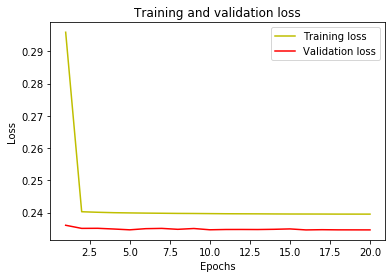

In [62]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

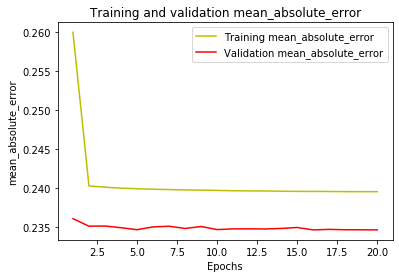

In [63]:
acc = history.history['mean_absolute_error']
val_acc = history.history['val_mean_absolute_error']
plt.plot(epochs, acc, 'y', label='Training mean_absolute_error')
plt.plot(epochs, val_acc, 'r', label='Validation mean_absolute_error')
plt.title('Training and validation mean_absolute_error')
plt.xlabel('Epochs')
plt.ylabel('mean_absolute_error')
plt.legend()
plt.show()

In [64]:
test = test.reindex(columns=['date_block_num', 'shop_id', 'item_id', 'year', 'month',
       'item_mean_month', 'item_cnt_prev_month', 'item_name',
       'item_category_id', 'item_category_name', 'shop_name'])



In [65]:
test

,date_block_num,shop_id,item_id,year,month,item_mean_month,item_cnt_prev_month,item_name,item_category_id,item_category_name,shop_name
0,34,5,5037,2015,11,1.181818,0.0,5037,19,19,5
1,34,5,5320,2015,11,0.000000,0.0,5320,55,55,5
2,34,5,5233,2015,11,1.428571,1.0,5233,19,19,5
3,34,5,5232,2015,11,1.000000,0.0,5232,23,23,5
4,34,5,5268,2015,11,0.000000,0.0,5268,20,20,5
...,...,...,...,...,...,...,...,...,...,...,...
214195,34,45,18454,2015,11,1.800000,1.0,18454,55,55,45
214196,34,45,16188,2015,11,0.000000,0.0,16188,64,64,45
214197,34,45,15757,2015,11,1.166667,0.0,15757,55,55,45
214198,34,45,19648,2015,11,0.000000,0.0,19648,40,40,45


In [66]:
test2 = pd.read_csv('E:/personal_projects/competitive-data-science-predict-future-sales/test.csv')
submi = pd.DataFrame()
submi['ID'] = test2.ID
submi['item_cnt_month'] = model.predict(test)
submi['item_cnt_month'] = np.exp(submi['item_cnt_month'])
submi.to_csv('subj.csv', index = False)


In [67]:
submi

,ID,item_cnt_month
0,0,2.000169
1,1,2.000169
2,2,2.000169
3,3,2.000169
4,4,2.000169
...,...,...
214195,214195,2.000169
214196,214196,2.000169
214197,214197,2.000169
214198,214198,2.000169
